In [3]:
import numpy as np
import warnings 
from Library.CnnModel import TorchDataset, CNNModel
import torch.nn as nn
warnings.filterwarnings('ignore')


In [4]:
WIFI_1M = np.load("Data_\WIFI.npy")
Clear = np.load("Data_\Clear.npy")
LTE_1M = np.load("Data_\LTE_1M.npy")

In [5]:
df= TorchDataset(Clear,WIFI_1M ,LTE_1M,
                  reshape=True,
                    sliced=100000000, 
                    values_reshaped= 2000) ; data = df.reshaped ;data

,Signals,0,1,2,3,4,5,6,7,8,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Label
0,CLEAR,0.000000,-0.000061,-0.000031,0.000031,-0.000061,-0.000031,0.000183,0.000000,0.000214,...,0.000092,0.000153,0.000122,0.000275,0.000305,0.000183,0.000061,0.000214,0.000092,0
1,CLEAR,0.000092,-0.000031,0.000183,0.000031,0.000336,0.000000,0.000000,-0.000244,0.000244,...,0.000305,0.000000,0.000336,0.000061,0.000183,0.000092,0.000061,0.000000,0.000000,0
2,CLEAR,-0.000092,0.000031,-0.000183,0.000031,-0.000031,0.000214,-0.000122,0.000244,-0.000305,...,0.000153,-0.000122,-0.000092,-0.000122,-0.000153,-0.000336,0.000153,-0.000366,-0.000183,0
3,CLEAR,-0.000244,-0.000031,-0.000031,-0.000031,-0.000244,0.000000,-0.000397,-0.000153,-0.000336,...,-0.000153,0.000061,0.000214,0.000153,0.000092,0.000000,-0.000061,-0.000031,-0.000031,0
4,CLEAR,0.000183,-0.000061,0.000000,-0.000122,0.000183,-0.000214,0.000000,-0.000183,0.000000,...,-0.000061,0.000061,-0.000214,0.000061,-0.000122,-0.000031,0.000061,0.000061,0.000031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,LTE,-0.000092,0.000153,0.000061,0.000244,0.000092,0.000275,0.000000,-0.000031,0.000061,...,0.000336,0.000122,0.000214,0.000061,0.000031,-0.000061,-0.000092,0.000061,0.000031,2
299996,LTE,-0.000061,0.000183,0.000031,0.000000,0.000122,-0.000061,0.000153,0.000061,0.000244,...,-0.000061,-0.000092,-0.000092,-0.000061,-0.000061,-0.000244,0.000336,-0.000214,0.000000,2
299997,LTE,0.000122,-0.000122,0.000153,0.000214,-0.000305,-0.000031,-0.000366,-0.000122,0.000031,...,0.000000,-0.000122,-0.000153,-0.000092,0.000122,-0.000031,0.000000,-0.000153,-0.000031,2
299998,LTE,-0.000305,0.000061,0.000000,-0.000092,0.000427,-0.000122,0.000000,0.000244,-0.000183,...,-0.000244,0.000153,-0.000214,0.000061,0.000031,0.000000,-0.000092,0.000275,0.000275,2


In [6]:
X_train, X_test, y_train, y_test = df.Spliting(data= data, random_state= 42, test_size = 0.275, shuffle = True)

print("X_train:", X_train.shape)
print("X_Test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (217500, 2000)
X_Test: (82500, 2000)
y_train: (217500,)
y_test: (82500,)


In [7]:
batch_size  = 512
train_dataloader , test_dataloader = df.DataLoaders(batch_size=batch_size)
X, y = next(iter(train_dataloader))
X.shape, y.shape

(torch.Size([512, 2000]), torch.Size([512]))

In [8]:
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001EDEF70E3D0>, <torch.utils.data.dataloader.DataLoader object at 0x000001ED81B27090>)
Length of train dataloader: 425 batches of 512
Length of test dataloader: 162 batches of 512


In [9]:
model = df.CNNModel

In [11]:
df.CNNModel

CNNModel(
  (layer1): Sequential(
    (0): Conv1d(2000, 512, kernel_size=(2,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(512, 32, kernel_size=(2,), stride=(1,), padding=(1,))
    (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Conv1d(64, 128, kernel_size=(2,), stride=(1,), padding=(1,))
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv1d(128, 256, kernel_size=(

In [12]:
from helper_functions import accuracy_fn
import torch
import torch.optim as optim
import torch.nn as nn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0125)
# device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [13]:
df.train_step(data_loader_train=train_dataloader,
        data_loader_test = test_dataloader,
                model=model, 
                loss_fn=loss_fn,
                optimizer=optimizer,
                accuracy_fn=accuracy_fn,
                device=device,
                epochs = 10)



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.20730 | Train accuracy: 56.02%


 10%|█         | 1/10 [06:01<54:14, 361.60s/it]

Test loss: 82.55949 | Test accuracy: 75.43%
Epoch: 1
---------
Train loss: 0.97121 | Train accuracy: 78.30%


 20%|██        | 2/10 [12:34<50:41, 380.16s/it]

Test loss: 77.59394 | Test accuracy: 79.45%
Epoch: 2
---------
Train loss: 0.92561 | Train accuracy: 82.42%


 30%|███       | 3/10 [18:40<43:33, 373.38s/it]

Test loss: 76.82889 | Test accuracy: 80.02%
Epoch: 3
---------
Train loss: 0.89020 | Train accuracy: 85.94%


 40%|████      | 4/10 [24:27<36:18, 363.11s/it]

Test loss: 76.57837 | Test accuracy: 80.24%
Epoch: 4
---------
Train loss: 0.86144 | Train accuracy: 88.72%


 50%|█████     | 5/10 [29:11<27:52, 334.56s/it]

Test loss: 76.70819 | Test accuracy: 79.98%
Epoch: 5
---------
Train loss: 0.84132 | Train accuracy: 90.65%


 60%|██████    | 6/10 [33:28<20:32, 308.23s/it]

Test loss: 76.48472 | Test accuracy: 80.25%
Epoch: 6
---------
Train loss: 0.82675 | Train accuracy: 92.06%


 70%|███████   | 7/10 [38:00<14:48, 296.23s/it]

Test loss: 76.21374 | Test accuracy: 80.61%
Epoch: 7
---------
Train loss: 0.81623 | Train accuracy: 93.03%


 80%|████████  | 8/10 [42:06<09:20, 280.50s/it]

Test loss: 76.58245 | Test accuracy: 80.12%
Epoch: 8
---------
Train loss: 0.80958 | Train accuracy: 93.64%


 90%|█████████ | 9/10 [46:11<04:29, 269.18s/it]

Test loss: 76.86064 | Test accuracy: 79.76%
Epoch: 9
---------
Train loss: 0.80393 | Train accuracy: 94.18%


100%|██████████| 10/10 [50:01<00:00, 300.12s/it]

Test loss: 76.50309 | Test accuracy: 80.24%


In [14]:
y_pred_tensor = df.Making_Predictions(data_loader=test_dataloader, model=model)
y_pred_tensor

Making predictions: 100%|██████████| 162/162 [00:14<00:00, 11.34it/s]


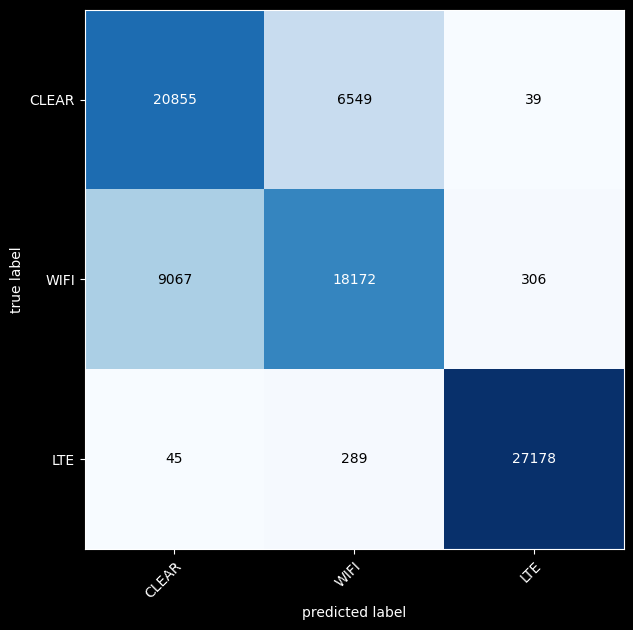

In [15]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

class_names = ['CLEAR','WIFI','LTE']
confmat = ConfusionMatrix(num_classes=3, task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target= df.y_test )

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [16]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, recall_score)


print(classification_report(df.y_test, y_pred_tensor,target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.70      0.76      0.73     27443
        WIFI       0.73      0.66      0.69     27545
         LTE       0.99      0.99      0.99     27512

    accuracy                           0.80     82500
   macro avg       0.80      0.80      0.80     82500
weighted avg       0.80      0.80      0.80     82500

